# BERCHMANS KEVIN S



## Loan Approval Classification using SVM

##### `Step1`

In [1]:
import pandas as pd

In [2]:
loan = pd.read_csv('train_loan.csv')

In [3]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
loan.shape

(614, 13)

In [6]:
loan.size

7982

In [7]:
loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
type(loan)

pandas.core.frame.DataFrame

In [9]:
loan.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [10]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


##### `Step2`

In [12]:
loan.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [13]:
def string(x):
    if x=='0':
        return 'bad'
    elif x=='1':
        return 'average'
    elif x=='2':
        return 'good'
    else:
        return 'excellent'

In [14]:
loan['Dependents']=loan['Dependents'].apply(string)

In [15]:
loan.isna().mode()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
loan.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
#categorical features

loan['Gender'].fillna(loan['Gender'].mode()[0],inplace=True)

loan['Married'].fillna(loan['Married'].mode()[0],inplace=True)

loan['Dependents'].fillna(loan['Dependents'].mode()[0],inplace=True)

loan['Education'].fillna(loan['Education'].mode()[0],inplace=True)

loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0],inplace=True)

loan['Credit_History'].fillna(loan['Credit_History'].mode()[0],inplace=True)

loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mode()[0],inplace=True)

In [18]:
#numerical featur

loan['LoanAmount'].fillna(loan['LoanAmount'].mean(),inplace=True)

In [19]:
loan = loan.drop(['Loan_ID'],axis=1)

##### `Step3`

In [20]:
import matplotlib.pyplot as plt

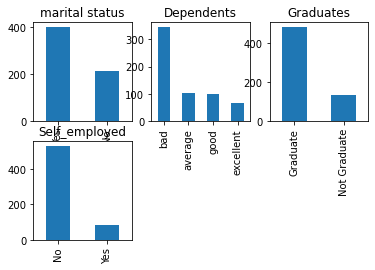

In [21]:
plt.subplot(231)
loan['Married'].value_counts().plot(kind='bar',title='marital status')

plt.subplot(232)
loan['Dependents'].value_counts().plot(kind='bar',title='Dependents')

plt.subplot(233)
loan['Education'].value_counts().plot(kind='bar',title='Graduates')

plt.subplot(234)
loan['Self_Employed'].value_counts().plot(kind='bar',title='Self_employed')
plt.show()

##### `Step4`

In [22]:
X = loan.drop(['Loan_Status'],axis=1)

In [23]:
y = loan['Loan_Status']

In [24]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,bad,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban
1,Male,Yes,average,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural
2,Male,Yes,bad,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban
3,Male,Yes,bad,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban
4,Male,No,bad,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,bad,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural
610,Male,Yes,excellent,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural
611,Male,Yes,average,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban
612,Male,Yes,good,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban


In [25]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

##### `Step5`

In [26]:
X = pd.get_dummies(X)